<a href="https://colab.research.google.com/github/LucasFerrSil/Fenomenos-Eletromagneticos/blob/main/ELETROMAG_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def desviopadrao(vetor):
    soma = 0
    c = len(vetor)
    for i in range(c):
        soma += vetor[i][0]
    media = soma/c
    soma_dos_quadrados = 0
    for i in range(c):
        soma_dos_quadrados += (vetor[i][0] - media)**2
    desvio = (soma_dos_quadrados/(c*(c - 1)))**(1/2)
    x = [media,desvio]
    return x

In [ ]:
a0 = [10/100,0.05/100]
print(a0)
i0 = [5.94,0.19]
B0=18*10**(-6)
i1=[[1.08,0.07],[1.45,0.08],[2.00,0.09],[2.51,0.1],[3.01,0.11],[4.02,0.14]]
theta1= [[4,0.5],[8,0.5],[11,0.5],[13.5,0.5],[19.5,0.5],[23.5,0.5]]
a2=[[12.2,0.05],[18.5,0.05],[29,0.05],[6,0.05],[24,0.05],[1,0.05]]
theta2 = [[16,0.5],[14,0.5],[2,0.5],[31,0.5],[8,0.5],[65,0.5]]

def mudar(v,i,j):
  a = tuple(v)
  v[i-1] = a[j-1]
  v[j-1] = a[i-1]
def essecaso(v):
  mudar(v,6,1)
  mudar(v,4,2)
  mudar(v,3,6)
def radiano(theta):
  return theta*math.pi/180

essecaso(a2)
essecaso(theta2)

[0.1, 0.0005]


In [ ]:
tg1 = [math.tan(radiano(theta1[i][0])) for i in range(len(theta1))]
B1=[[B0*tg1[i],(B0*math.pi*0.5)/((math.cos(radiano(theta1[i][0]))**2)*180)] for i in range(len(theta1))]
am = [[a2[i][0]/100,a2[i][1]/100] for i in range(len(a2))]

tg2 = [math.tan(radiano(theta2[i][0])) for i in range(len(theta2))]
B2=[[B0*tg2[i],(B0*math.pi*0.5)/((math.cos(radiano(theta2[i][0]))**2)*180)] for i in range(len(theta2))]
w = [[1/am[i][0],(am[i][1])/(am[i][0]**2)] for i in range(len(am))]

[[0.01, 0.0005], [0.06, 0.0005], [0.122, 0.0005], [0.185, 0.0005], [0.24, 0.0005], [0.29, 0.0005]]


In [ ]:
tabela1 = [[i1[i][0],i1[i][1],theta1[i][0],theta1[i][1],round(tg1[i],3),round(B1[i][0]*10**6,2),round(B1[i][1]*10**6,2)] for i in range(len(i1))]

df = pd.DataFrame(tabela1,columns=['Corrente','Sigma Corrente','Theta','Sigma theta','Tangente','B','Sigma B'])
display(df)

tabela2 = [[am[i][0],am[i][1],theta2[i][0],theta2[i][1],round(tg2[i],3),round(B2[i][0]*10**6,2),round(B2[i][1]*10**6,2)] for i in range(len(am))]

df2 = pd.DataFrame(tabela2,columns=['Distancia','Sigma Distancia','Theta','Sigma theta','Tangente','B','Sigma B'])
display(df2)

tabela3 = [[w[i][0],w[i][1],round(B2[i][0]*10**6,2),round(B2[i][1]*10**6,2)] for i in range(len(w))]

df3 = pd.DataFrame(tabela3,columns=['Inverso da distancia','Sigma Inverso da distancia','B','Sigma B'])
display(df3)

,Corrente,Sigma Corrente,Theta,Sigma theta,Tangente,B,Sigma B
0,1.08,0.07,4.0,0.5,0.070,1.26,0.16
1,1.45,0.08,8.0,0.5,0.141,2.53,0.16
2,2.00,0.09,11.0,0.5,0.194,3.50,0.16
3,2.51,0.10,13.5,0.5,0.240,4.32,0.17
4,3.01,0.11,19.5,0.5,0.354,6.37,0.18
5,4.02,0.14,23.5,0.5,0.435,7.83,0.19


,Distancia,Sigma Distancia,Theta,Sigma theta,Tangente,B,Sigma B
0,0.010,0.0005,65,0.5,2.145,38.60,0.88
1,0.060,0.0005,31,0.5,0.601,10.82,0.21
2,0.122,0.0005,16,0.5,0.287,5.16,0.17
3,0.185,0.0005,14,0.5,0.249,4.49,0.17
4,0.240,0.0005,8,0.5,0.141,2.53,0.16
5,0.290,0.0005,2,0.5,0.035,0.63,0.16


,Inverso da distancia,Sigma Inverso da distancia,B,Sigma B
0,100.000000,5.000000,38.60,0.88
1,16.666667,0.138889,10.82,0.21
2,8.196721,0.033593,5.16,0.17
3,5.405405,0.014609,4.49,0.17
4,4.166667,0.008681,2.53,0.16
5,3.448276,0.005945,0.63,0.16


In [ ]:
def somav(v):
  soma = 0
  for i in range(len(v)):
      valor = 1/((v[i][1])**2)
      soma += valor
  return soma

def somx(x,y,valor):
  soma = 0
  for i in range(len(x)):
      termo = x[i][0]/((y[i][1])**2)
      soma += termo
  soma = soma/valor
  return soma

def sox2(x,y,valor):
  soma = 0
  for i in range(len(x)):
      termo = ((x[i][0])**2)/((y[i][1])**2)
      soma += termo
  soma = soma/valor
  return soma

def somay(x,y,valor):
  soma = 0
  for i in range(len(y)):
      termo = (y[i][0])/((y[i][1])**2)
      soma += termo
  soma = soma/valor
  return soma

def somaxy(x,y,valor):
  soma = 0
  for i in range(len(x)):
      termo = (x[i][0])*(y[i][0])/(y[i][1])**2
      soma += termo
  soma = soma/valor
  return soma

def a(somax,somay,somaxy,somax2,valor):
  a = ((somax*somay) - somaxy)/((somax**2) - somax2)
  t = abs(1/(valor*((somax2) - (somax**2))))
  x = [a,t**(1/2)]
  return x

def b(somay,a,somax,somax2,valor):
  b = somay - a[0]*somax
  t = abs((somax2/valor)/((somax2) - (somax**2)))
  x = [b,t**(1/2)]
  return x

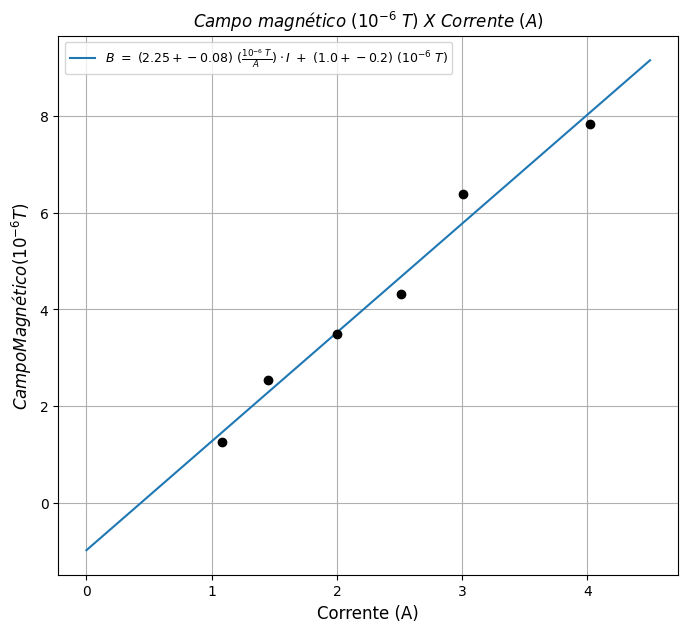

In [ ]:
x1 = i1
y = B1

valor = somav(y)
somax2 = somx(x1,y,valor)
somax22 = sox2(x1,y,valor)
somay12 = somay(x1,y,valor)
somaxy12 = somaxy(x1,y,valor)
a1 = a(somax2,somay12,somaxy12,somax22,valor)
b1 = b(somay12,a1,somax2,somax22,valor)

x = np.linspace(0,4.5)
y1 = (a1[0]*x+b1[0])*10**(6)
fig, ax = plt.subplots(figsize=(8,7))
ax.set_xlabel('Corrente (A)', fontsize = 12)
ax.set_ylabel('$Campo Magnético (10^{-6}T)$', fontsize = 12)
plt.grid()
ax.plot(x,y1,label=r'$B~=~(2.25 +-0.08)~(\frac{10^{-6}~T}{A})\cdot I~+~(1.0+-0.2)~(10^{-6}~T)$')
ax.set_title('$Campo~magnético~(10^{-6}~T)~X~Corrente~(A)$')
for i in range(len(i1)):
  ax.plot(i1[i][0],B1[i][0]*10**(6),'ok')

ax.legend(prop = {"size" : 9})
plt.savefig('CD.png')

[4.40966727390791e-07, 8.40124530760279e-09] [1.0905238516546728e-06, 9.796628838016467e-08]


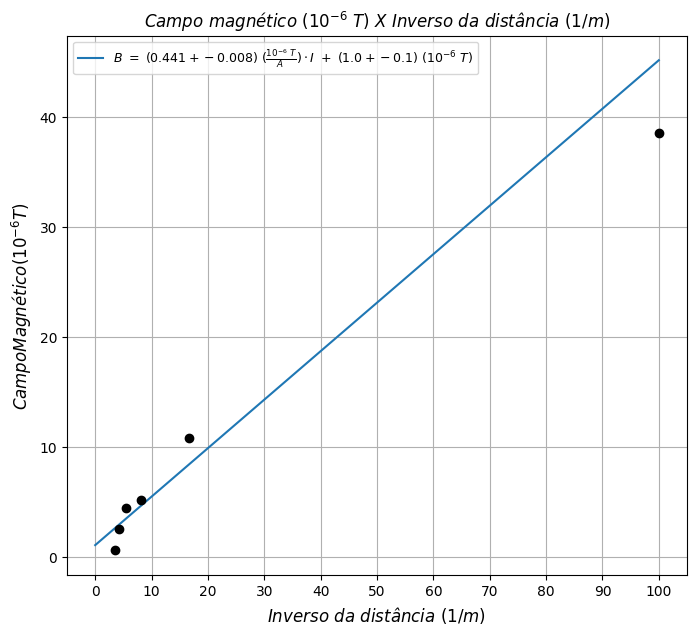

In [ ]:
x2 = w
y = B2

valor = somav(y)
somax2 = somx(x2,y,valor)
somax22 = sox2(x2,y,valor)
somay12 = somay(x2,y,valor)
somaxy12 = somaxy(x2,y,valor)
a3 = a(somax2,somay12,somaxy12,somax22,valor)
b2 = b(somay12,a3,somax2,somax22,valor)

x = np.linspace(0,100,10)
y1 = (a3[0]*x+b2[0])*10**(6)
fig, ax = plt.subplots(figsize=(8, 7))
plt.xticks(np.linspace(0, 100, 11))
ax.set_xlabel('$Inverso~da~distância~(1/m) $', fontsize = 12)
ax.set_ylabel('$Campo Magnético (10^{-6}T)$', fontsize = 12)
plt.grid()
ax.plot(x,y1,label=r'$B~=~(0.441 +-0.008)~(\frac{10^{-6}~T}{A})\cdot I~+~(1.0+-0.1)~(10^{-6}~T)$')
#ax.plot(x,y1,label=r'$B~=~(0.71 +-0.02)~(\frac{10^{-6}~T}{A})\cdot I~+~(-0.6+-0.1)~(10^{-6}~T)$')
ax.set_title('$Campo~magnético~(10^{-6}~T)~X~Inverso~da~distância~(1/m)$')
#ax.set_title('$Campo~magnético~(10^{-6}~T)~X~Inverso~da~distância~{\frac{1}{m}$')
for i in range(len(w)):
  ax.plot(w[i][0],B2[i][0]*10**(6),'ok')

ax.legend(prop = {"size" : 9})
plt.savefig('CD.png')
print(a3,b2)

In [ ]:
pi = math.pi
u = a3[0]*2*math.pi/i0[0]
sigmau = ((a3[1]*2*math.pi/i0[0])**2 + (a3[0]*2*pi*i0[1]/(i0[0]**2))**2)**(1/2)
v0 = [u,sigmau]

In [ ]:
pi = math.pi
distancia_media = desviopadrao(am)
campo_medio = desviopadrao(B2)
u2 = campo_medio[0]*2*pi*distancia_media[0]/i0[0]
sigmau2 = ((campo_medio[1]*2*pi*distancia_media[0]/i0[0])**2 + (campo_medio[0]*2*pi*distancia_media[1]/i0[0])**2 + (campo_medio[0]*2*pi*distancia_media[0]*i0[1]/(i0[0]**2))**2 )**(1/2)
v2= [u2,sigmau2]

In [ ]:
corrente_media = desviopadrao(i1)
campo_medio = desviopadrao(B1)
u1 = campo_medio[0]*2*pi*a0[0]/corrente_media[0]
sigmau1 = ((campo_medio[1]*2*pi*a0[0]/corrente_media[0])**2  + (campo_medio[0]*2*pi*a0[1]/corrente_media[0])**2 + (campo_medio[0]*2*pi*a0[0]*corrente_media[1]/(corrente_media[0])**2)**2)**(1/2)
v1 = [u1,sigmau1]

In [ ]:
u3 = a1[0]*2*pi*a0[0]
sigmau3 = ((a1[1]*2*pi*a0[0])**2 + (a0[1]*a1[0]*2*pi)**2)**(1/2)
v3 = [u3,sigmau3]

In [ ]:
v4 = []
for i in range(4,5):
  valor = B1[i][0]*2*pi*am[i][0]/i0[0]
  print(am[i])
  sigmav4 =  ((B1[i][1]*2*pi*am[i][0]/i0[0])**2  + (B1[i][0]*2*pi*am[i][1]/i0[0])**2 + (B1[i][0]*2*pi*am[i][0]*i0[1]/(i0[0])**2)**2)**(1/2)
  v4.append([valor,sigmav4])
print((v4))


[0.24, 0.0005]
[[1.6181764450358473e-06, 6.858908921262034e-08]]


In [ ]:
valores = [v0,v1,v2,v3,v4[0]]
desvioval = (desviopadrao(valores))
valores.append(desvioval)
df = pd.DataFrame(valores,columns=['Mi','Sigma Mi'])
display(df)

,Mi,Sigma Mi
0,4.664437e-07,1.736595e-08
1,1.152562e-06,3.434068e-07
2,1.658280e-06,1.048029e-06
3,1.414598e-06,4.578534e-08
4,1.618176e-06,6.858909e-08
5,1.262012e-06,2.181825e-07
